In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading the datasets

In [2]:
# Training datasets:

train_beneficiary = pd.read_csv('../data/Train_Beneficiarydata.csv')
train_inpatient = pd.read_csv('../data/Train_Inpatientdata.csv')
train_outpatient = pd.read_csv('../data/Train_Outpatientdata.csv')
train_labels = pd.read_csv('../data/Train_labels.csv')

# Test datasets:
test_beneficiary = pd.read_csv('../data/Test_Beneficiarydata.csv')
test_inpatient = pd.read_csv('../data/Test_Inpatientdata.csv')
test_outpatient = pd.read_csv('../data/Test_Outpatientdata.csv')
test_labels = pd.read_csv('../data/Test_labels.csv')

# Datasets Sanity Check

In [3]:
print ("Training Data Shapes:")
print ("  Training Beneficiary Data Shape:", train_beneficiary.shape)
print ("  Training Inpatient Data Shape:", train_inpatient.shape)
print ("  Training Outpatient Data Shape:", train_outpatient.shape)
print ("  Training Labels Data Shape:", train_labels.shape)
print()
print ("Test Data Shapes:")
print ("  Test Beneficiary Data Shape:", test_beneficiary.shape)
print ("  Test Inpatient Data Shape:", test_inpatient.shape)
print ("  Test Outpatient Data Shape:", test_outpatient.shape)
print ("  Test Labels Data Shape:", test_labels.shape)

Training Data Shapes:
  Training Beneficiary Data Shape: (138556, 25)
  Training Inpatient Data Shape: (40474, 30)
  Training Outpatient Data Shape: (517737, 27)
  Training Labels Data Shape: (5410, 2)

Test Data Shapes:
  Test Beneficiary Data Shape: (63968, 25)
  Test Inpatient Data Shape: (9551, 30)
  Test Outpatient Data Shape: (125841, 27)
  Test Labels Data Shape: (1353, 1)


## Checking for missing values

In [4]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Create summary table
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'}
    )

    # Filter only columns that have missing values
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] > 0]

    # Check if nothing is missing
    if mis_val_table.empty:
        print(f"This dataframe has {df.shape[1]} columns and {df.shape[0]} rows.")
        return "✔ No missing values found in any column."

    # Otherwise, sort and print summary
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    print(f"This dataframe has {df.shape[1]} columns and {df.shape[0]} rows.")
    print(f"There are {mis_val_table.shape[0]} columns that have missing values.")

    return mis_val_table

### Missing values in Training Data

In [5]:
print("Missing values in Training Beneficiary Data:")
print(missing_values_table(train_beneficiary))

Missing values in Training Beneficiary Data:
This dataframe has 25 columns and 138556 rows.
There are 1 columns that have missing values.
     Missing Values  % of Total Values
DOD          137135          98.974422


In [6]:
print("Missing values in Training Inpatient Data:")
print(missing_values_table(train_inpatient))

Missing values in Training Inpatient Data:
This dataframe has 30 columns and 40474 rows.
There are 19 columns that have missing values.
                     Missing Values  % of Total Values
ClmProcedureCode_6            40474         100.000000
ClmProcedureCode_5            40465          99.977764
ClmProcedureCode_4            40358          99.713396
ClmProcedureCode_3            39509          97.615753
ClmDiagnosisCode_10           36547          90.297475
OtherPhysician                35784          88.412314
ClmProcedureCode_2            35020          86.524683
ClmProcedureCode_1            17326          42.807728
OperatingPhysician            16644          41.122696
ClmDiagnosisCode_9            13497          33.347334
ClmDiagnosisCode_8             9942          24.563918
ClmDiagnosisCode_7             7258          17.932500
ClmDiagnosisCode_6             4838          11.953353
ClmDiagnosisCode_5             2894           7.150269
ClmDiagnosisCode_4             1534    

In [7]:
print("Missing values in Training Outpatient Data:")
print(missing_values_table(train_outpatient))

Missing values in Training Outpatient Data:
This dataframe has 27 columns and 517737 rows.
There are 20 columns that have missing values.
                       Missing Values  % of Total Values
ClmProcedureCode_6             517737         100.000000
ClmProcedureCode_5             517737         100.000000
ClmProcedureCode_4             517735          99.999614
ClmProcedureCode_3             517733          99.999227
ClmProcedureCode_2             517701          99.993047
ClmProcedureCode_1             517575          99.968710
ClmDiagnosisCode_10            516654          99.790820
ClmDiagnosisCode_9             502899          97.134066
ClmDiagnosisCode_8             494825          95.574587
ClmDiagnosisCode_7             484776          93.633640
ClmDiagnosisCode_6             468981          90.582864
ClmDiagnosisCode_5             443393          85.640586
OperatingPhysician             427120          82.497484
ClmAdmitDiagnosisCode          412312          79.637345
ClmDiag

In [8]:
print("Missing values in Training Labels Data:")
print(missing_values_table(train_labels))

Missing values in Training Labels Data:
This dataframe has 2 columns and 5410 rows.
✔ No missing values found in any column.


### Missing values in Test Data

In [9]:
print("Missing values in Test Beneficiary Data:")
print(missing_values_table(test_beneficiary))

Missing values in Test Beneficiary Data:
This dataframe has 25 columns and 63968 rows.
There are 1 columns that have missing values.
     Missing Values  % of Total Values
DOD           63394          99.102676


In [10]:
print("Missing values in Test Inpatient Data:")
print(missing_values_table(test_inpatient))

Missing values in Test Inpatient Data:
This dataframe has 30 columns and 9551 rows.
There are 19 columns that have missing values.
                     Missing Values  % of Total Values
ClmProcedureCode_6             9551         100.000000
ClmProcedureCode_5             9549          99.979060
ClmProcedureCode_4             9522          99.696367
ClmProcedureCode_3             9328          97.665166
ClmDiagnosisCode_10            8664          90.713014
OtherPhysician                 8538          89.393781
ClmProcedureCode_2             8297          86.870485
ClmProcedureCode_1             4118          43.115904
OperatingPhysician             3962          41.482567
ClmDiagnosisCode_9             3238          33.902209
ClmDiagnosisCode_8             2360          24.709455
ClmDiagnosisCode_7             1736          18.176107
ClmDiagnosisCode_6             1197          12.532719
ClmDiagnosisCode_5              719           7.528008
ClmDiagnosisCode_4              404         

In [11]:
print("Missing values in Test Outpatient Data:")
print(missing_values_table(test_outpatient))

Missing values in Test Outpatient Data:
This dataframe has 27 columns and 125841 rows.
There are 20 columns that have missing values.
                       Missing Values  % of Total Values
ClmProcedureCode_4             125841         100.000000
ClmProcedureCode_5             125841         100.000000
ClmProcedureCode_6             125841         100.000000
ClmProcedureCode_3             125839          99.998411
ClmProcedureCode_2             125832          99.992848
ClmProcedureCode_1             125807          99.972982
ClmDiagnosisCode_10            125578          99.791006
ClmDiagnosisCode_9             122278          97.168649
ClmDiagnosisCode_8             120310          95.604771
ClmDiagnosisCode_7             117871          93.666611
ClmDiagnosisCode_6             114035          90.618320
ClmDiagnosisCode_5             107875          85.723254
OperatingPhysician             104237          82.832304
ClmAdmitDiagnosisCode          100036          79.493965
ClmDiagnosi

In [12]:
print("Missing values in Test Labels Data:")
print(missing_values_table(test_labels))

Missing values in Test Labels Data:
This dataframe has 1 columns and 1353 rows.
✔ No missing values found in any column.


### Findings on Missing Values

```ClmProcedureCode_6``` is 100% missing in both training and test for both inpatient and outpatient datasets. Therefore, it will be dropped from all datasets.


In [13]:
# Dropping columns with 100% missing values in both training and test datasets
train_inpatient = train_inpatient.drop(columns=['ClmProcedureCode_6'])
test_inpatient = test_inpatient.drop(columns=['ClmProcedureCode_6'])
train_outpatient = train_outpatient.drop(columns=['ClmProcedureCode_6'])
test_outpatient = test_outpatient.drop(columns=['ClmProcedureCode_6'])

Checking the columns of all datasets after dropping the columns with 100% missing values.

In [14]:
datasets = {
    "train_beneficiary": train_beneficiary,
    "train_inpatient": train_inpatient,
    "train_outpatient": train_outpatient,
    "train_labels": train_labels,
    "test_beneficiary": test_beneficiary,
    "test_inpatient": test_inpatient,
    "test_outpatient": test_outpatient,
    "test_labels": test_labels
}

for name, df in datasets.items():
    print(f"\n{name} columns:")
    print(list(df.columns))


train_beneficiary columns:
['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

train_inpatient columns:
['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmD

Further analysis and handling will be done on missing values later after merging.

# Merging Datasets

## Train Data Merging

### Merging Train Outpatient and Inpatient Data with Beneficiary and Labels

In [15]:
# Merge Train Outpatient Data

# First merge with Beneficiary data to get patient details
train_outpatient_merged = pd.merge(train_outpatient, train_beneficiary, on='BeneID', how='left')

# Then merge with Labels to attach the fraud flag to every claim
train_outpatient_merged = pd.merge(train_outpatient_merged, train_labels, on='Provider', how='left')

print(f"Shape of train_outpatient_merged: {train_outpatient_merged.shape}")

Shape of train_outpatient_merged: (517737, 51)


In [16]:
# Merge Train Inpatient Data

# First merge with Beneficiary data to get patient details
train_inpatient_merged = pd.merge(train_inpatient, train_beneficiary, on='BeneID', how='left')

# Then merge with Labels to attach the fraud flag to every claim
train_inpatient_merged = pd.merge(train_inpatient_merged, train_labels, on='Provider', how='left')

print(f"Shape of train_inpatient_merged: {train_inpatient_merged.shape}")

Shape of train_inpatient_merged: (40474, 54)


In [17]:
# Get the sets of columns from both merged dataframes
inpatient_cols = set(train_inpatient_merged.columns)
outpatient_cols = set(train_outpatient_merged.columns)

# Find columns present in Inpatient but NOT in Outpatient
inpatient_only = inpatient_cols - outpatient_cols

# Find columns present in Outpatient but NOT in Inpatient
outpatient_only = outpatient_cols - inpatient_cols

print(f"Columns unique to Inpatient Data ({len(inpatient_only)}")
print(list(inpatient_only))

print(f"\n Columns unique to Outpatient Data ({len(outpatient_only)}")
print(list(outpatient_only))

Columns unique to Inpatient Data (3
['DiagnosisGroupCode', 'DischargeDt', 'AdmissionDt']

 Columns unique to Outpatient Data (0
[]


In [18]:
train_inpatient_merged['IsInpatient'] = 1
train_outpatient_merged['IsInpatient'] = 0

### Investigating the differences in columns between Inpatient and Outpatient data

#### AdmissionDt vs ClaimStartDt

In [19]:
# Check rows where ClaimStartDt != AdmissionDt
inpatient_start_date_mismatch = train_inpatient_merged[train_inpatient_merged['ClaimStartDt'] != train_inpatient_merged['AdmissionDt']]
print(f"Rows with mismatched Start dates: {len(inpatient_start_date_mismatch)}")
inpatient_start_date_mismatch

Rows with mismatched Start dates: 32


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,IsInpatient
2163,BENE18587,CLM37486,2009-02-10,2009-02-11,PRV52020,3000,PHY359519,NaN,NaN,2009-02-08,2859,1068.0,2009-02-11,804,2859,2639,V113,4550,4168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1934-10-01,NaN,2,1,0,10,120,12,12,2,1,2,2,1,1,1,1,1,2,2,11000,3204,1300,390,Yes,1
4422,BENE26849,CLM70032,2009-10-02,2009-10-07,PRV56647,12000,PHY332134,NaN,NaN,2009-09-29,2930,1068.0,2009-10-07,867,0389,5990,570,27651,42820,486,25000,4589,42833,NaN,NaN,NaN,NaN,NaN,NaN,1969-07-01,NaN,1,1,0,45,320,12,12,2,1,1,1,1,1,1,2,2,1,2,27210,2136,2920,1950,Yes,1
5400,BENE30503,CLM67400,2009-09-12,2009-09-14,PRV54228,3000,PHY364179,NaN,NaN,2009-09-09,5789,1068.0,2009-09-14,376,56211,27651,2948,V140,4019,3004,41401,5771,2724,NaN,NaN,NaN,NaN,NaN,NaN,1932-07-01,NaN,2,1,0,25,230,12,12,1,1,1,2,2,1,1,1,1,2,2,14000,3204,0,0,No,1
5647,BENE31388,CLM40738,2009-03-07,2009-03-08,PRV51490,16000,PHY325912,PHY325912,NaN,2009-03-02,25070,1068.0,2009-03-08,242,25070,V4587,5856,73319,25000,41401,40391,99591,73017,40390,8411.0,NaN,NaN,NaN,NaN,1943-07-01,NaN,1,1,Y,5,490,12,12,2,2,1,2,1,2,1,1,1,1,2,16000,1068,60,20,Yes,1
5869,BENE32209,CLM58624,2009-07-10,2009-07-17,PRV51249,6000,PHY326642,PHY383790,PHY372651,2009-07-06,5990,1068.0,2009-07-17,862,03842,4280,28731,53081,99591,2900,78550,27651,NaN,NaN,9921.0,NaN,NaN,NaN,NaN,1940-06-01,NaN,2,1,0,37,390,12,12,1,1,1,2,1,2,2,1,2,2,2,6000,1068,930,220,Yes,1
7828,BENE39685,CLM47198,2009-04-20,2009-04-22,PRV53705,600,PHY416391,PHY356670,NaN,2009-04-16,78903,1068.0,2009-04-22,348,78720,56409,4011,2777,78321,5772,71590,5601,2724,NaN,9390.0,NaN,NaN,NaN,NaN,1921-01-01,NaN,2,1,Y,21,210,12,12,1,1,1,1,1,1,1,1,1,1,2,10600,3204,7270,620,No,1
7869,BENE39802,CLM73187,2009-11-01,2009-11-05,PRV52100,3000,PHY366670,PHY348391,NaN,2009-10-24,5780,1068.0,2009-11-05,349,53140,V1649,4019,185,25000,78720,4280,33394,40390,NaN,NaN,NaN,NaN,NaN,NaN,1939-01-01,NaN,1,1,0,10,280,12,12,2,1,1,1,2,2,1,1,1,2,2,8240,2136,560,50,Yes,1
9051,BENE44335,CLM76442,2009-11-26,2009-11-27,PRV56259,10000,PHY397137,NaN,NaN,2009-11-18,78701,1068.0,2009-11-27,868,0389,78552,41400,2863,570,9070,99592,51881,5990,NaN,NaN,NaN,NaN,NaN,NaN,1926-06-01,NaN,2,1,0,42,140,12,12,1,1,2,2,1,1,1,1,2,1,2,21360,3204,0,0,Yes,1
9215,BENE45010,CLM32686,2009-01-11,2009-01-23,PRV56778,24000,PHY418898,PHY392068,NaN,2009-01-06,78900,1068.0,2009-01-23,371,56081,2639,5768,03812,4270,4271,4019,3439,78959,9974,5459.0,5119.0,NaN,NaN,NaN,1972-02-01,NaN,2,2,Y,45,310,12,12,1,1,1,2,1,1,1,1,2,1,1,24000,1068,5340,1520,No,1
11103,BENE51932,CLM44148,2009-03-28,2009-03-29,PRV51282,4000,PHY323106,NaN,NaN,2009-03-26,6826,1068.0,2009-03-29,599,6826,4439,5859,5733,5853,04112,4280,29680,25000,70715,NaN,NaN,NaN,NaN,NaN,1917-03-01,NaN,1,1,Y,4,330,12,12,2,1,1,2,2,1,1,1,2,1,2,4030,1068,60,200,No,1


##### Data Decision: Standardizing Start Dates

After taking closer look at the `AdmissionDt` and `ClaimStartDt` columns in the Inpatient data to see if they were redundant. It turns out they are **99.91% identical**, but the few exceptions are really important.

In the 32 cases where they differ, the **Admission Date always comes earlier**.

This difference tells me that the patient was physically admitted to the hospital *before* the specific billing period for the claim officially started.

If I strictly used `ClaimStartDt`, I would be calculating a "Length of Stay" that is shorter than reality. Since checking for extended, unnecessary hospital stays is a key part of detecting fraud, I need the most accurate physical start date possible, not just the billing date.

To capture the true duration of service while keeping my column names consistent for the eventual merge with Outpatient data (which lacks admission dates), I am going to overwrite `ClaimStartDt` with the values from `AdmissionDt`. This ensures `ClaimStartDt` always represents the *true* beginning of the service ,
Once that's done, I will drop `AdmissionDt` entirely. This prevents redundancy and ensures I always use the corrected `ClaimStartDt` for my analysis.

In [20]:
# Overwrite ClaimStartDt with AdmissionDt for Inpatient Data
# This captures the true start of the service (which we found is sometimes earlier than the claim start)
# while maintaining a common column name for future merging with Outpatient data.
train_inpatient_merged['ClaimStartDt'] = train_inpatient_merged['AdmissionDt']

# Verify the change
print("Sanity Check: \n")
print(f"Are ClaimStartDt and AdmissionDt now identical? \n {train_inpatient_merged['ClaimStartDt'].equals(train_inpatient_merged['AdmissionDt'])}")

train_inpatient_merged.drop(columns=['AdmissionDt'], inplace=True, axis=1)

print(f"Columns in Inpatient Data: {list(train_inpatient_merged.columns)} ")
print(f"\n Is 'AdmissionDt' still present? {'AdmissionDt' in train_inpatient_merged.columns}")

Sanity Check: 

Are ClaimStartDt and AdmissionDt now identical? 
 True
Columns in Inpatient Data: ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', '

#### DischargeDt vs ClaimEndDt

In [21]:
# Check rows where ClaimEndDt != DischargeDt
inpatient_end_date_mismatch = train_inpatient_merged[train_inpatient_merged['ClaimEndDt'] != train_inpatient_merged['DischargeDt']]
print(f"Rows with mismatched Start dates: {len(inpatient_end_date_mismatch)}")
inpatient_end_date_mismatch

Rows with mismatched Start dates: 17


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,IsInpatient
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,4439,1068.0,2009-01-09,255,99662,2639,E8782,920,V854,4280,E9320,04185,412,42732,3950.0,2762.0,NaN,NaN,NaN,1922-05-01,NaN,2,1,Y,6,500,12,12,2,1,1,2,1,1,1,1,1,2,2,20180,1068,33210,5858,Yes,1
3864,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,55221,1068.0,2009-01-09,345,56889,1122,40390,5185,42731,9974,4589,27801,25000,NaN,5369.0,NaN,NaN,NaN,NaN,1938-01-01,NaN,2,1,0,24,610,12,12,2,1,2,2,2,2,1,1,1,1,2,17000,2136,13320,1148,Yes,1
7752,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,44421,1068.0,2009-02-23,254,4422,42731,60783,4019,44021,V1582,2724,25040,4439,27801,3712.0,NaN,NaN,NaN,NaN,1940-05-01,NaN,1,1,0,24,200,12,12,2,2,1,1,2,2,1,1,2,1,2,19000,1068,19180,1708,Yes,1
9094,BENE44545,CLM82209,2009-01-18,2009-01-27,PRV52843,14000,PHY365072,NaN,NaN,85181,1068.0,2009-01-25,023,85202,43411,4280,25000,2449,3485,78720,5070,5990,NaN,NaN,NaN,NaN,NaN,NaN,1934-07-01,NaN,1,1,0,18,530,12,12,2,1,2,2,2,1,1,1,2,1,1,14350,1068,14010,1068,Yes,1
9974,BENE47786,CLM82208,2009-05-27,2009-06-04,PRV52828,14000,PHY391167,NaN,NaN,486,1068.0,2009-06-01,166,486,412,36960,60000,V140,27652,53081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-10-01,NaN,1,1,0,15,290,12,12,1,1,2,2,1,2,1,1,2,1,2,18450,2136,17470,1488,Yes,1
17060,BENE73681,CLM82213,2009-02-10,2009-02-21,PRV54354,11000,PHY397703,NaN,PHY390453,78079,1068.0,2009-02-18,315,41071,2724,496,42833,5849,42831,5853,28860,V4502,NaN,NaN,NaN,NaN,NaN,NaN,1945-09-01,NaN,1,1,0,26,930,12,12,2,1,1,2,1,1,1,1,2,2,2,11000,1068,11000,1068,Yes,1
18267,BENE78133,CLM82210,2009-01-02,2009-01-05,PRV53461,20000,PHY331754,PHY426843,NaN,72981,1068.0,2009-01-03,228,44422,9982,V4581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.0,NaN,NaN,NaN,NaN,1931-08-01,NaN,1,1,0,19,510,12,12,2,1,2,2,1,2,1,1,2,1,2,20010,1068,20970,2108,Yes,1
21298,BENE88968,CLM82205,2009-02-23,2009-02-28,PRV52045,24000,PHY339550,PHY359571,NaN,78650,1068.0,2009-02-25,304,V5332,4280,4019,41071,42741,V8536,4271,4148,4275,NaN,54.0,NaN,NaN,NaN,NaN,1921-09-01,NaN,1,1,0,10,170,12,12,2,1,1,1,2,2,1,1,2,1,2,24200,1068,24760,1548,Yes,1
26395,BENE107828,CLM82216,2009-01-01,2009-01-22,PRV55018,19000,PHY364322,PHY320450,NaN,78900,1068.0,2009-01-19,439,5758,4280,5781,4439,41071,496,5990,5856,2720,486,5123.0,7850.0,NaN,NaN,NaN,1940-10-01,NaN,1,1,Y,33,331,12,12,2,1,1,2,1,2,2,1,2,2,2,19000,1068,19000,1068,Yes,1
27053,BENE110116,CLM82217,2009-02-09,2009-03-17,PRV56268,20000,PHY400645,PHY408610,NaN,25010,1068.0,2009-03-16,642,25080,4271,99673,40391,42789,42731,56881,5184,73007,NaN,3950.0,NaN,NaN,NaN,NaN,1934-06-01,NaN,1,1,0,42,70,12,12,1,1,1,2,1,1,1,1,1,2,2,19800,6136,23330,1158,Yes,1


##### Feature Engineering: Post-Discharge Billing Flag

We identified inpatient claims where the billing period (`ClaimEndDt`) extends beyond the patient's discharge date (`DischargeDt`). In our analysis, **100% of these cases were labeled as Potential Fraud**.

We will create a specific boolean flag to capture this suspicious behavior:
**`IsPostDischargeBilling`**: A binary indicator (1 for Yes, 0 for No). If `ClaimEndDt > DischargeDt`, then **1**, else **0**. it explicitly marks claims that violate the logical timeline of a hospital stay.

Since outpatient Data lack a `DischargeDt`, this risk factor is irrelevant to them. We will set this flag to **0** (False) for all outpatient records.

After creating this flag, we will drop the `DischargeDt` column from the inpatient data to avoid redundancy and get ready.

In [22]:
# Create Feature: Post-Discharge Billing Flag (Inpatient)
train_inpatient_merged['IsPostDischargeBilling'] = np.where(
    train_inpatient_merged['ClaimEndDt'] > train_inpatient_merged['DischargeDt'],
    1,0
)

# Handle Outpatient Data
# The concept doesn't exist for Outpatient, so we flag them all as 0
train_outpatient_merged['IsPostDischargeBilling'] = 0

# Check the counts
flagged_counts = train_inpatient_merged['IsPostDischargeBilling'].value_counts()
print(f"Inpatient Claims Flagged (1): {flagged_counts.get(1, 0)}")
print(f"Inpatient Claims Normal (0): {flagged_counts.get(0, 0)}")

# Drop DischargeDt after creating the flag
train_inpatient_merged.drop(columns=['DischargeDt'], inplace=True, axis=1)

Inpatient Claims Flagged (1): 17
Inpatient Claims Normal (0): 40457


#### DiagnosisGroupCode

In [23]:
print(f"Unique Diagnosis Group Codes: {train_inpatient_merged['DiagnosisGroupCode'].nunique()}")

Unique Diagnosis Group Codes: 736


In [24]:
train_inpatient['DiagnosisGroupCode'].value_counts()

DiagnosisGroupCode
882    179
884    174
166    168
183    165
939    163
168    160
883    160
887    159
204    158
945    156
876    156
949    154
208    153
202    153
167    153
198    152
188    151
192    150
177    150
196    150
182    150
885    149
184    149
940    147
186    146
180    146
941    145
181    145
175    145
880    145
946    144
886    144
881    144
193    144
948    142
205    142
187    142
197    141
164    141
947    141
206    139
203    135
207    134
191    134
000    134
185    133
190    132
179    132
950    132
200    131
199    130
176    129
189    129
201    129
163    128
165    127
242    126
178    126
256    124
303    123
195    123
249    122
862    122
286    122
853    122
294    121
252    121
864    121
230    120
223    120
238    120
244    120
229    119
316    119
235    117
295    117
951    116
309    116
240    115
867    114
246    114
194    113
OTH    113
281    113
280    112
255    112
228    111
250    111
283    110
23

##### Data Alignment: Handling Diagnosis Codes

I noticed a structural mismatch: **Inpatient** data has a `DiagnosisGroupCode` (which is valuable), but **Outpatient** data does not. If I try to merge them into one master dataset now, the columns won't align.

Instead of engineering complex scores right now, I am simply **harmonizing the schemas**.

For Outpatient Data:** I am adding the `DiagnosisGroupCode` column and filling it with **"Not applicable"**.

This ensures both datasets have the exact same set of columns. It honestly reflects that outpatient claims don't involve Diagnosis Groups, allowing me to concatenate them cleanly. I will handle the encoding of these codes (like calculating Risk Scores) in the modeling phase.

In [25]:
# Handle Outpatient Data
# Outpatient data lacks DiagnosisGroupCode, so we assign it to not applicable
train_outpatient_merged['DiagnosisGroupCode'] = 'Not applicable'

### Merging Inpatient and Outpatient Data

In [26]:
# Check shapes before merging
print(f"Shape of Inpatient Merged Data: {train_inpatient_merged.shape}")
print(f"Shape of Outpatient Merged Data: {train_outpatient_merged.shape}")

Shape of Inpatient Merged Data: (40474, 54)
Shape of Outpatient Merged Data: (517737, 54)


In [27]:
# Check columns before merging
print("Inpatient Data Columns:")
print(list(train_inpatient_merged.columns))
print("\nOutpatient Data Columns:")
print(list(train_outpatient_merged.columns), '\n')

inpatient_cols = set(train_inpatient_merged.columns)
outpatient_cols = set(train_outpatient_merged.columns)

if inpatient_cols == outpatient_cols:
    print("✔ Columns match perfectly.")
else:
    print("⚠ Column Mismatch detected!")
    print(f"In Inpatient only: {inpatient_cols - outpatient_cols}")
    print(f"In Outpatient only: {outpatient_cols - inpatient_cols}")

Inpatient Data Columns:
['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAn

In [28]:
# Perform the Merge (Concatenation)
train_merged = pd.concat([train_inpatient_merged, train_outpatient_merged], ignore_index=True)

print(f"Inpatient Rows: {train_inpatient_merged.shape[0]}")
print(f"Outpatient Rows: {train_outpatient_merged.shape[0]}")
print(f"Total Merged Rows: {train_merged.shape[0]}")
print(f"Total Columns: {train_merged.shape[1]}")

Inpatient Rows: 40474
Outpatient Rows: 517737
Total Merged Rows: 558211
Total Columns: 54


## Test Data Merging

### Test Data Pipeline

Apply the exact same cleaning, formatting, and merging steps to the **Test Data** that we applied to the Training Data.

**Key Differences:**
* **No Labels:** The Test data does not have a `PotentialFraud` column. We will create this column and fill it with `NaN` (Not a Number) so the dataframe structure matches the Training data exactly.
* **Data Alignment:** Instead of calculating complex risk scores now, we focus on ensuring the **Test** data has the exact same column structure as the **Training** data (handling the missing `DiagnosisGroupCode` in outpatient records) so they can be processed together later.

**Steps:**
1.  **Merge:** Combine Claims with Beneficiary data.
2.  **Feature Engineering & Alignment:**
    * Create `IsInpatient`.
    * Fix Dates (Overwrite `ClaimStartDt` with `AdmissionDt` for Inpatient).
    * Flag `IsPostDischargeBilling`.
    * **Harmonize Diagnosis Codes:** Set `DiagnosisGroupCode` to **"Not applicable"** for Outpatient data (since it doesn't exist) to match the Inpatient schema.
3.  **Concatenate:** Create the final `test_merged` dataset.

In [29]:
# Test Data Processing Pipeline

# Merge with Beneficiary Data
test_outpatient_merged = pd.merge(test_outpatient, test_beneficiary, on='BeneID', how='left')
test_inpatient_merged = pd.merge(test_inpatient, test_beneficiary, on='BeneID', how='left')

# Add Missing Target Column (Filled with NaN)
test_outpatient_merged['PotentialFraud'] = np.nan
test_inpatient_merged['PotentialFraud'] = np.nan

In [30]:
# Create 'IsInpatient' Flag
test_inpatient_merged['IsInpatient'] = 1
test_outpatient_merged['IsInpatient'] = 0

In [31]:
# Inpatient Specific Fixes (Dates)
# Overwrite ClaimStartDt with AdmissionDt (True Start), then drop AdmissionDt
test_inpatient_merged['ClaimStartDt'] = test_inpatient_merged['AdmissionDt']
test_inpatient_merged.drop(columns=['AdmissionDt'], inplace=True)

# Feature: IsPostDischargeBilling
# Inpatient: Calculate flag, then drop DischargeDt
test_inpatient_merged['IsPostDischargeBilling'] = np.where(
    test_inpatient_merged['ClaimEndDt'] > test_inpatient_merged['DischargeDt'], 1, 0
)
test_inpatient_merged.drop(columns=['DischargeDt'], inplace=True)

# Outpatient: Does not apply (Set to 0)
test_outpatient_merged['IsPostDischargeBilling'] = 0

In [32]:
# Harmonize Diagnosis Group Code
# Inpatient: Keep the raw codes as is.
# Outpatient: Does not exist, so set to 'Not applicable' to match the Training schema.
test_outpatient_merged['DiagnosisGroupCode'] = 'Not applicable'

In [33]:
# Merge Inpatient and Outpatient Test Data
test_merged = pd.concat([test_inpatient_merged, test_outpatient_merged], ignore_index=True)

# Verification
print(f"--- Test Data Processing Complete ---")
print(f"Test Rows: {test_merged.shape[0]}")
print(f"Test Columns: {test_merged.shape[1]}")

# Check if columns match exactly (Order doesn't matter for set comparison)
cols_match = set(test_merged.columns) == set(train_merged.columns)
print(f"Columns Match Train? {cols_match}")

if not cols_match:
    print(f"Missing in Test: {set(train_merged.columns) - set(test_merged.columns)}")
    print(f"Extra in Test: {set(test_merged.columns) - set(train_merged.columns)}")

--- Test Data Processing Complete ---
Test Rows: 135392
Test Columns: 54
Columns Match Train? True


# Data Exploration

In [34]:
train_merged.shape

(558211, 54)

In [35]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmAdmitDiagnosisCode            145899 non-null  object 
 10  DeductibleAmtPaid                557312 non-null  float64
 11  DiagnosisGroupCode               558211 non-null  object 
 12  Cl

In [36]:
# Calculate the number of null values
null_sum = train_merged.isnull().sum()

# Calculate the percentage of null values
null_pct = (train_merged.isnull().sum() / len(train_merged)) * 100

# Calculate the number of unique values
nunique = train_merged.nunique()

# Combine these into a single DataFrame for a clean view
summary_df = pd.DataFrame({
    'Null Count': null_sum,
    'Null Percentage': null_pct,
    'Unique Values': nunique
})

# Display the summary
print(summary_df)

                                 Null Count  Null Percentage  Unique Values
BeneID                                    0         0.000000         138556
ClaimID                                   0         0.000000         558211
ClaimStartDt                              0         0.000000            398
ClaimEndDt                                0         0.000000            366
Provider                                  0         0.000000           5410
InscClaimAmtReimbursed                    0         0.000000            438
AttendingPhysician                     1508         0.270149          82063
OperatingPhysician                   443764        79.497538          35315
OtherPhysician                       358475        64.218548          46457
ClmAdmitDiagnosisCode                412312        73.863109           4098
DeductibleAmtPaid                       899         0.161050             17
DiagnosisGroupCode                        0         0.000000            737
ClmDiagnosis

## DOB (Date of Birth)

In [37]:
train_merged['DOB'].value_counts(dropna=False).head()

DOB
1943-12-01    2072
1939-03-01    2030
1942-10-01    1989
1939-04-01    1984
1938-09-01    1971
Name: count, dtype: int64

#### Feature Engineering: Beneficiary Age

we will Calculate the exact age of each beneficiary to use as a demographic feature.

* **Reference Date:** We set the "current" date to **2010-01-01**. This roughly aligns with the dataset's timeline (2009 claims) and as if we are only 1 day after data delivered (earliest date in data is 31st of December 2009".
* **Formula:** Age = (2010-01-01 - Date of Birth (`DOB`) )/ **365.25**
(accounting for leap years) to get a precise float value , capturing the exact continuous age including months & days.

In [38]:
def calculate_age(df, ref_date_str='2010-01-01'):
    # Define Reference Date
    ref_date = pd.Timestamp(ref_date_str)

    # Ensure DOB is datetime
    df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

    # Calculate Age in Days then convert to Years (float)
    # We use 365.25 to account for leap years over a lifetime
    df['Age'] = (ref_date - df['DOB']).dt.days / 365.25

    return df

# Apply the function to calculate age
print("Calculating Patient Ages (Reference: 2010-01-01)")
train_merged = calculate_age(train_merged)

print(f"Train Age Range: {train_merged['Age'].min():.1f} to {train_merged['Age'].max():.3f} years")

Calculating Patient Ages (Reference: 2010-01-01)
Train Age Range: 26.1 to 100.999 years


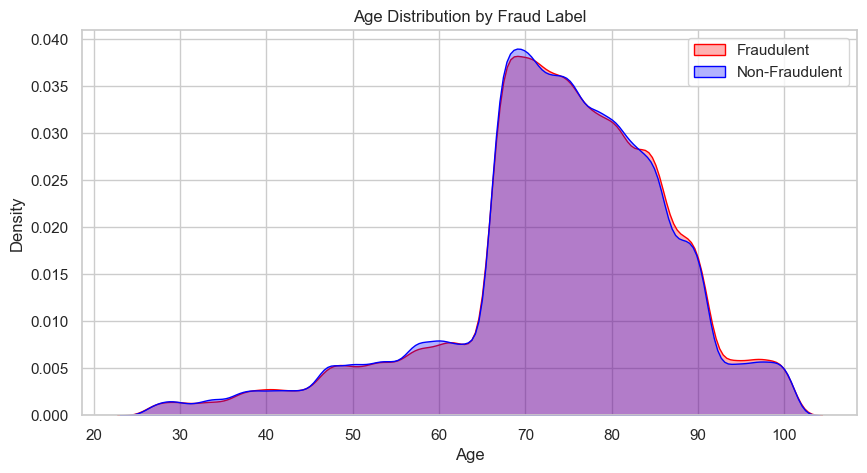

In [39]:
# Visualization: Age Distribution for Fraud vs Non-Fraud
plt.figure(figsize=(10, 5))
sns.kdeplot(data=train_merged[train_merged['PotentialFraud']=='Yes'], x='Age', label='Fraudulent', fill=True, color='red', alpha=0.3)
sns.kdeplot(data=train_merged[train_merged['PotentialFraud']=='No'], x='Age', label='Non-Fraudulent', fill=True, color='blue', alpha=0.3)
plt.title('Age Distribution by Fraud Label')
plt.legend()
plt.show()

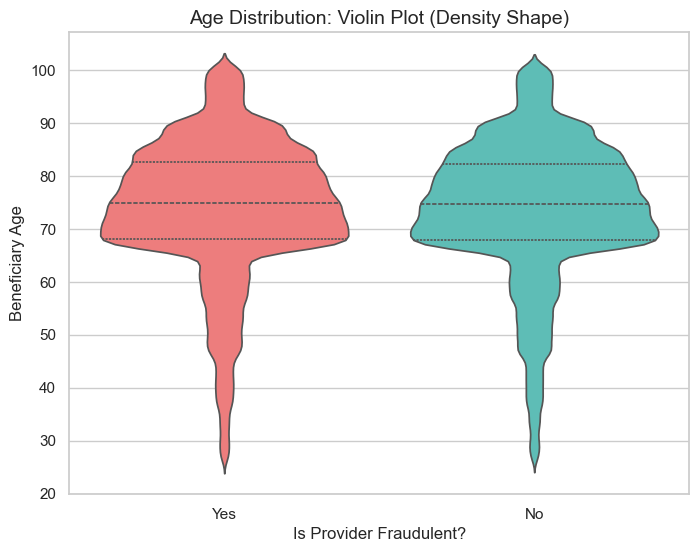

In [40]:
# Violin Plot (Density Shape)

plt.figure(figsize=(8, 6)) # Individual figure size

sns.violinplot(
    data=train_merged,
    x='PotentialFraud',
    y='Age',
    hue='PotentialFraud',
    palette={'Yes': '#ff6b6b', 'No': '#4ecdc4'}, # Custom clean colors
    inner='quartile' # Draws lines for 25%, 50%, 75%
)

plt.title('Age Distribution: Violin Plot (Density Shape)', fontsize=14)
plt.xlabel('Is Provider Fraudulent?')
plt.ylabel('Beneficiary Age')
plt.show()

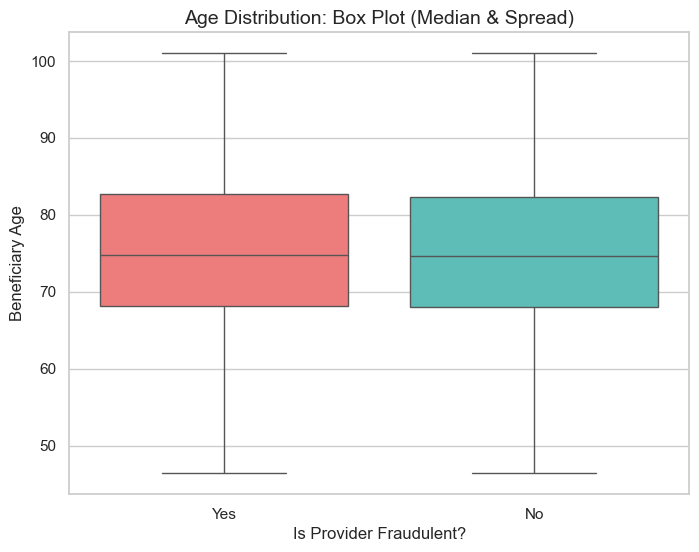

In [41]:
# Box Plot (Median & Spread)

plt.figure(figsize=(8, 6)) # Individual figure size

sns.boxplot(
    data=train_merged,
    x='PotentialFraud',
    y='Age',
    hue='PotentialFraud',
    palette={'Yes': '#ff6b6b', 'No': '#4ecdc4'},
    showfliers=False # Hides extreme outliers to keep the plot clean
)

plt.title('Age Distribution: Box Plot (Median & Spread)', fontsize=14)
plt.xlabel('Is Provider Fraudulent?')
plt.ylabel('Beneficiary Age')
plt.show()

In [42]:
# Drop original DOB column after extracting Age , as age is more useful for
# modeling and preserves the same exact info (sense it is a decimal value)
train_merged.drop(columns=['DOB'], inplace=True, axis=1)

## DOD (Date of Death)

In [43]:
train_merged['DOD'].value_counts(dropna=False)

DOD
NaN           554080
2009-12-01       710
2009-10-01       572
2009-11-01       560
2009-09-01       511
2009-08-01       482
2009-07-01       371
2009-06-01       295
2009-05-01       243
2009-04-01       166
2009-03-01       157
2009-02-01        64
Name: count, dtype: int64

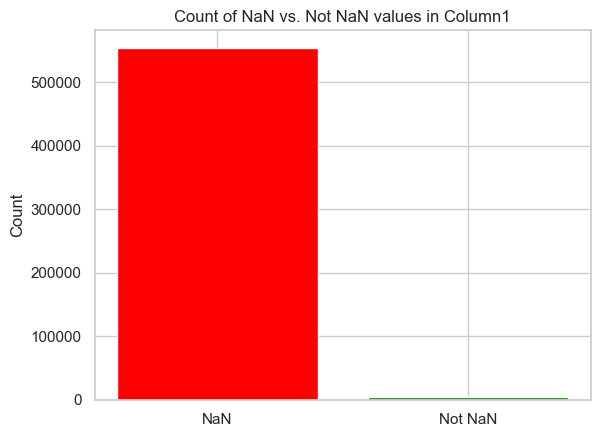

In [44]:
nan_count = train_merged['DOD'].isna().sum()
not_nan_count = train_merged['DOD'].notna().sum()

counts = {'NaN': nan_count, 'Not NaN': not_nan_count}
plt.bar(counts.keys(), counts.values(), color=['red', 'green'])
plt.title('Count of NaN vs. Not NaN values in Column1')
plt.ylabel('Count')
plt.show()

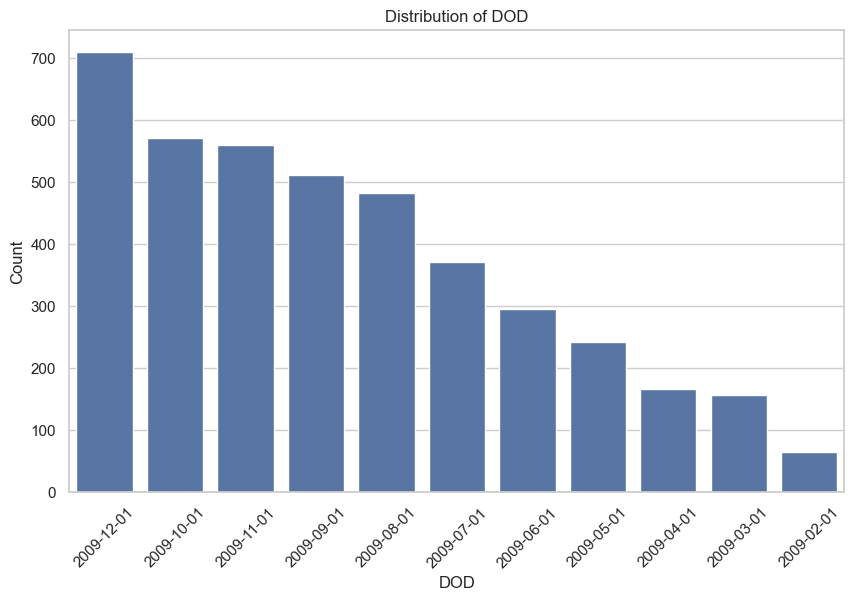

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_merged, x='DOD', order=train_merged['DOD'].value_counts().index)
plt.title('Distribution of DOD')
plt.xlabel('DOD')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [46]:
print("Count of Not NaN DOD values where PotentialFraud is Yes:")
print(train_merged['DOD'].notna()[train_merged['PotentialFraud'] == 'Yes'].sum())

print("Count of Not NaN DOD values where PotentialFraud is No:")
print(train_merged['DOD'].notna()[train_merged['PotentialFraud'] == 'No'].sum())

Count of Not NaN DOD values where PotentialFraud is Yes:
1544
Count of Not NaN DOD values where PotentialFraud is No:
2587


The Date of Death (DOD) column itself doesnt have meaning but from it we can derive a new feature called "Death During Claim" which indicates whether the patient died during the claim period.

where for DOD not null and DOD is between ClaimStartDt and ClaimEndDt we can say that the patient died during the claim period.

all other cases (nulls) we can say that the patient did not die during the claim period.

In [47]:
# Feature Engineering: Death During Claim

def create_death_flag(df):
    # Ensure datetime format
    df['DOD'] = pd.to_datetime(df['DOD'], errors='coerce')
    df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'], errors='coerce')
    df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'], errors='coerce')

    # Create the flag
    # Logic: DOD must exist AND be within the claim window
    df['DeathDuringClaim'] = np.where(
        (df['DOD'].notnull()) &
        (df['DOD'] >= df['ClaimStartDt']) &
        (df['DOD'] <= df['ClaimEndDt']),
        1,
        0
    )
    return df

train_merged = create_death_flag(train_merged)

# Verification
print("Death Flag Created.")
print(f"Train: {train_merged['DeathDuringClaim'].sum()} deaths during claim.")

# Quick relation to Fraud
if 'PotentialFraud' in train_merged.columns:
    print("\nFraud Rate for 'Death During Claim' cases:")
    print(train_merged[train_merged['DeathDuringClaim'] == 1]['PotentialFraud'].value_counts(normalize=True))

Death Flag Created.
Train: 21 deaths during claim.

Fraud Rate for 'Death During Claim' cases:
PotentialFraud
No     0.571429
Yes    0.428571
Name: proportion, dtype: float64


In [48]:
#not only it has a very small count , but it also there's
# no real significant relation between death during claim and potential fraud
#therfore we drop it
train_merged.drop(columns=['DeathDuringClaim'], inplace=True, axis=1)

#### Feature Engineering: IsDead Flag

In [49]:
# final idea , just keep a boolean flag indicating if DOD is present or not
# This is valuable: It tells us if the patient has a Date of Death recorded.
train_merged['IsDead'] = train_merged['DOD'].notnull().astype(int)
# drop the original DOD column
(train_merged.drop(columns=['DOD'], inplace=True, axis=1))
train_merged.shape

(558211, 54)

In [50]:
train_merged.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,IsInpatient,IsPostDischargeBilling,Age,IsDead
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes,1,0,67.000684,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,1,0,67.000684,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,1,0,67.000684,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No,1,0,95.838467,0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No,1,0,71.753593,0


## Diagnosis and Procedure Code

Since the values used for the 16 columns ```ClmAdmitDiagnosisCode``` , ```ClmDiagnosisCode```(1-10) and ```ClmProcedureCode```(1-5) are Numerical codes and our earliest date value in all columns is 31st of December 2009 and according to project description the data source is the  U.S. Centers for Medicare & Medicaid Services (CMS), I did my research and found out that the data was encoded by International Classification of Diseases (ICD) following ICD-9-CM Diagnosis and Procedure Code system version 28 (2010 October version).

which can be found at :

https://www.cms.gov/medicare/coding-billing/icd-10-codes/icd-9-cm-diagnosis-procedure-codes-abbreviated-and-full-code-titles

and downloaded from the following link as a zip file contains 6 txt & xls files :
 https://www.cms.gov/medicare/coding/icd9providerdiagnosticcodes/downloads/cmsv28_master_descriptions.zip

The DX files contain the codes for Diseases and Conditions (used in ClmDiagnosisCode_1 to ClmDiagnosisCode_10):
- 'CMS28_DESC_LONG_SHORT_DX.xls' : both long & short descriptions for diseases codes
- 'CMS28_DESC_LONG_DX.txt' : long descriptions only for diseases codes
- 'CMS28_DESC_SHORT_DX.txt' : short descriptions only for diseases codes

The SG files contain the codes for Surgical/Procedure (used in ClmProcedureCode_1 to ClmProcedureCode_5):
- 'CMS28_DESC_LONG_SHORT_SG.xls' : both long & short descriptions for procedure codes
- 'CMS28_DESC_LONG_SG.txt' : long descriptions only for procedure codes
- 'CMS28_DESC_SHORT_SG.txt' : short descriptions only for procedure codes

for our context , we will use the **short description** files

In [51]:
# Define the columns you want to pool together
proc_cols = [
    'ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'
]

# Stack them into one single Series and count
# stack() automatically drops NaN values, which is exactly what you want here.
distinct_counts = train_merged[proc_cols].stack().value_counts().head(10)

# View the top 10 most common codes across all 10 columns
print(distinct_counts)

4019     77056
25000    37356
2724     35763
V5869    24904
4011     23773
42731    20138
V5861    20001
2720     18268
2449     17600
4280     15507
Name: count, dtype: int64


In [52]:
# Define the columns you want to pool together
proc_cols = [
    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
    'ClmProcedureCode_4', 'ClmProcedureCode_5'
]

# Stack them into one single Series and count
# stack() automatically drops NaN values, which is exactly what you want here.
distinct_counts = train_merged[proc_cols].stack().value_counts().head(10)

# View the top 10 most common codes across all 5 columns
print(distinct_counts)

4019.0    1959
9904.0    1152
2724.0    1054
8154.0    1022
66.0       901
3893.0     854
3995.0     809
4516.0     651
3722.0     589
8151.0     463
Name: count, dtype: int64


## RenalDiseaseIndicator

In [53]:
train_merged['RenalDiseaseIndicator'].value_counts(dropna=False)

RenalDiseaseIndicator
0    448363
Y    109848
Name: count, dtype: int64

#### Data Cleaning: Y -> 1

In [54]:
train_merged['RenalDiseaseIndicator'] = train_merged['RenalDiseaseIndicator'].map({'Y': 1}).fillna(0).astype(int)

In [55]:
train_merged['RenalDiseaseIndicator'].value_counts(dropna=False)

RenalDiseaseIndicator
0    448363
1    109848
Name: count, dtype: int64

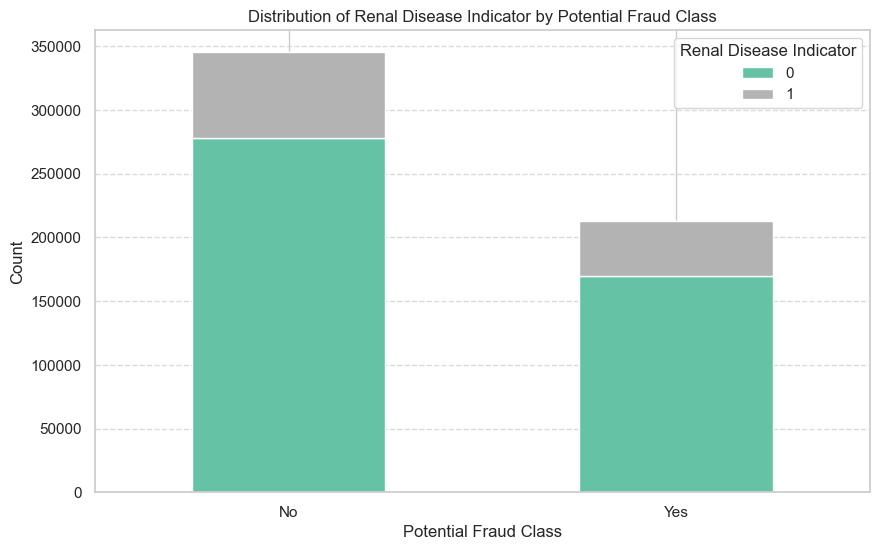

In [56]:
# Create a cross-tabulation of the two columns
counts = pd.crosstab(train_merged['PotentialFraud'], train_merged['RenalDiseaseIndicator'])

# Plot the stacked bar chart
ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Customizing the chart
plt.title('Distribution of Renal Disease Indicator by Potential Fraud Class')
plt.xlabel('Potential Fraud Class')
plt.ylabel('Count')
plt.legend(title='Renal Disease Indicator')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid for readability

plt.show()

In [57]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   ClmAdmitDiagnosisCode            145899 non-null  object        
 10  DeductibleAmtPaid                557312 non-